# Optional Task

Since the feature set X contains only nine features, it is feasible in this case to compute and evaluate models for all possible subsets of the set X and ﬁnd the subset with the smallest error on the test set.

### 1. Compute models and for all subsets of X and evaluate them by computing their errors (NMAE)

In [1]:
import pandas
import numpy
import matplotlib
import pylab
import sklearn.model_selection
import sklearn.linear_model
import random
import itertools

In [2]:
# import dataset_x and dataset_y
data_set_x = pandas.read_csv('X.csv')
data_set_y = pandas.read_csv('Y.csv')

# join operations similar to relational databases on field 'TimeStamp'
data_set = pandas.merge(data_set_x, data_set_y, on='TimeStamp')

In [3]:
(data_set_train, data_set_test) = sklearn.model_selection.train_test_split(data_set, test_size=0.3)

In [8]:
features = data_set_train.columns
features = features[1:-1] # all lines, all columns except the the first and last

features_error_by_subset_size = {}
for i in range(1,10):
    combinations_features = list(itertools.combinations(features, i))
    features_error_by_subset_size[i] = []
    for combination_feature in combinations_features:
        feature = list(combination_feature)
        feature.append('DispFrames')
        
        train = pandas.DataFrame(data_set_train, columns=feature)
        x = train.iloc[:, :-1] # all lines, all columns except the last
        y = train.iloc[:, -1] # all lines and only last column
        linear_regressor = sklearn.linear_model.LinearRegression()
        linear_regressor.fit(x, y)
    
        test = pandas.DataFrame(data_set_test, columns=feature)
        x = test.iloc[:, :-1] # all lines, all columns except the last
        y = test.iloc[:, -1] # all lines and only last column
        y_estimation = linear_regressor.predict(x)
        average_observations = test.iloc[:, -1].mean(axis=0)
        mean_absolute_error = sklearn.metrics.mean_absolute_error(y, y_estimation)
        normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations )
        
        features_error = (feature[:-1], normalized_mean_absolute_error)
        features_error_by_subset_size[i].append(features_error)   

###  2. Plot a histogram of the model errors. Set the bin size of the histogram to 0.01.

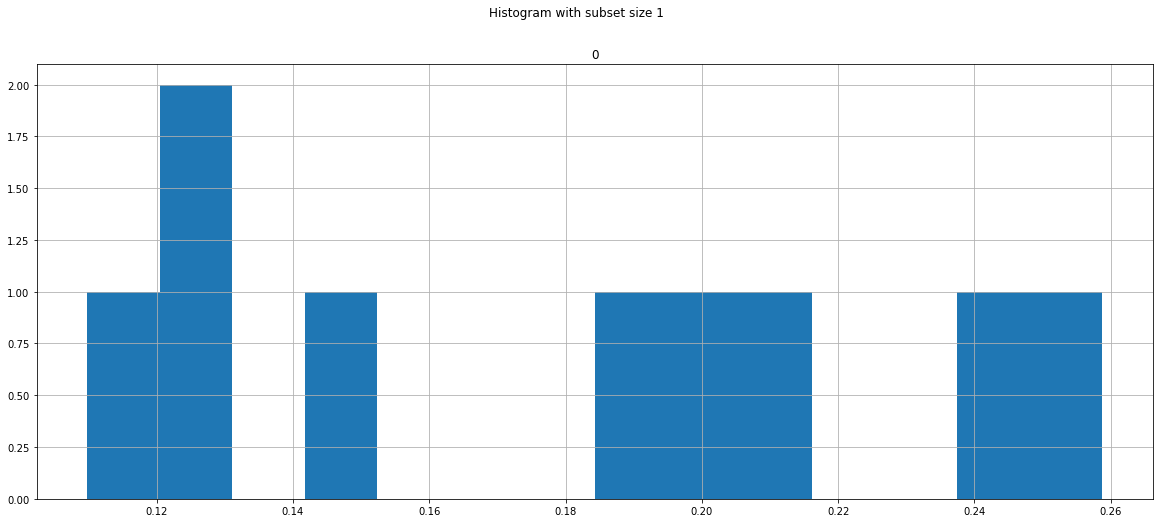

In [9]:
features_error = features_error_by_subset_size[1]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 1')
matplotlib.pyplot.show()

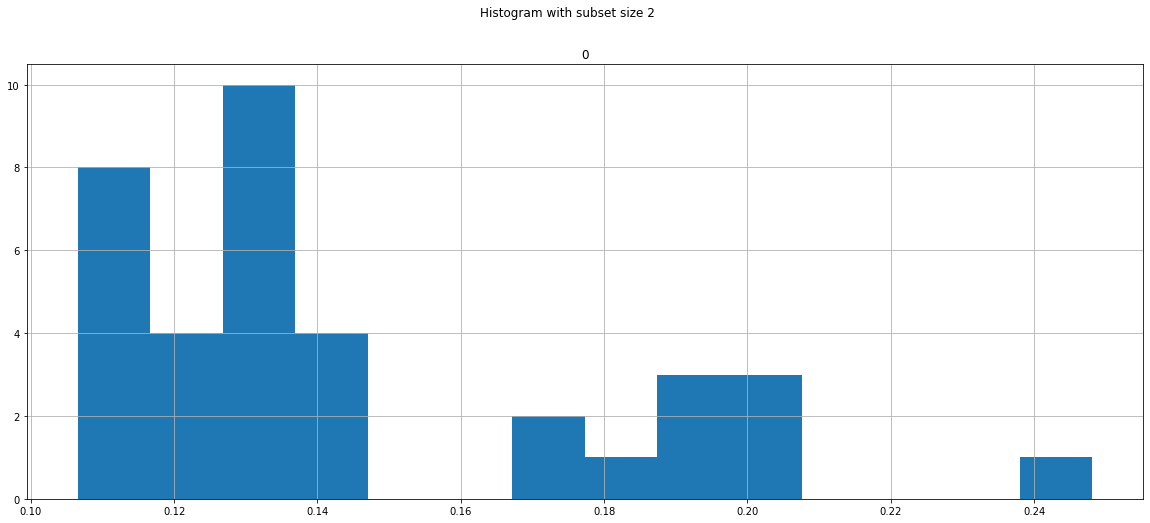

In [10]:
features_error = features_error_by_subset_size[2]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 2')
matplotlib.pyplot.show()

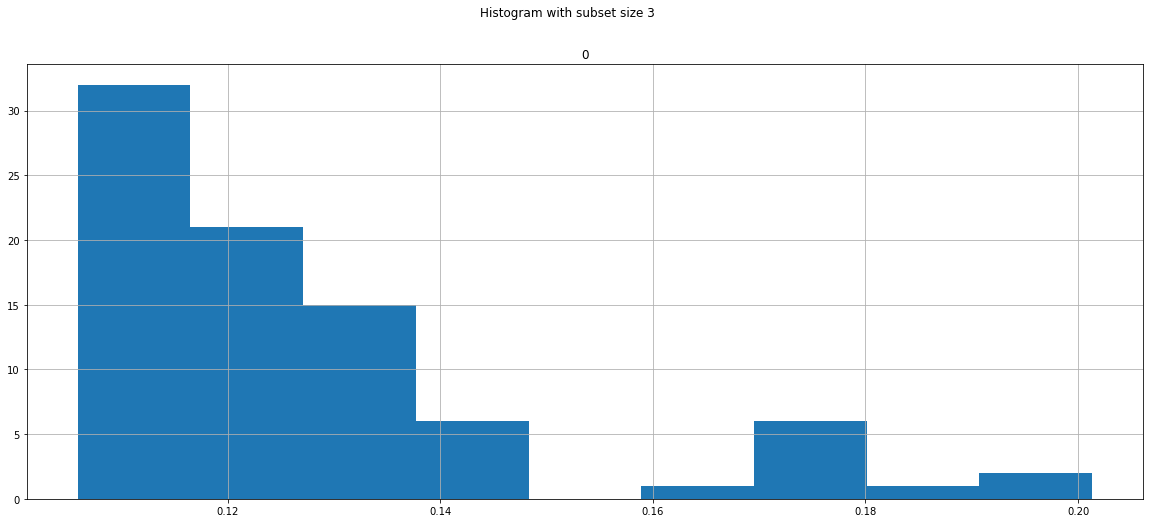

In [11]:
features_error = features_error_by_subset_size[3]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 3')
matplotlib.pyplot.show()

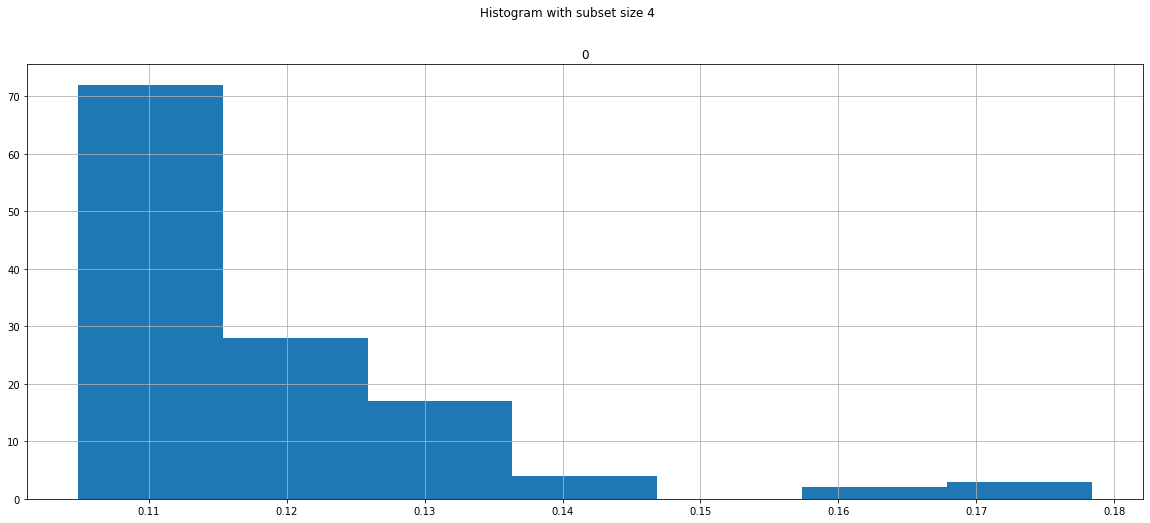

In [12]:
features_error = features_error_by_subset_size[4]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 4')
matplotlib.pyplot.show()

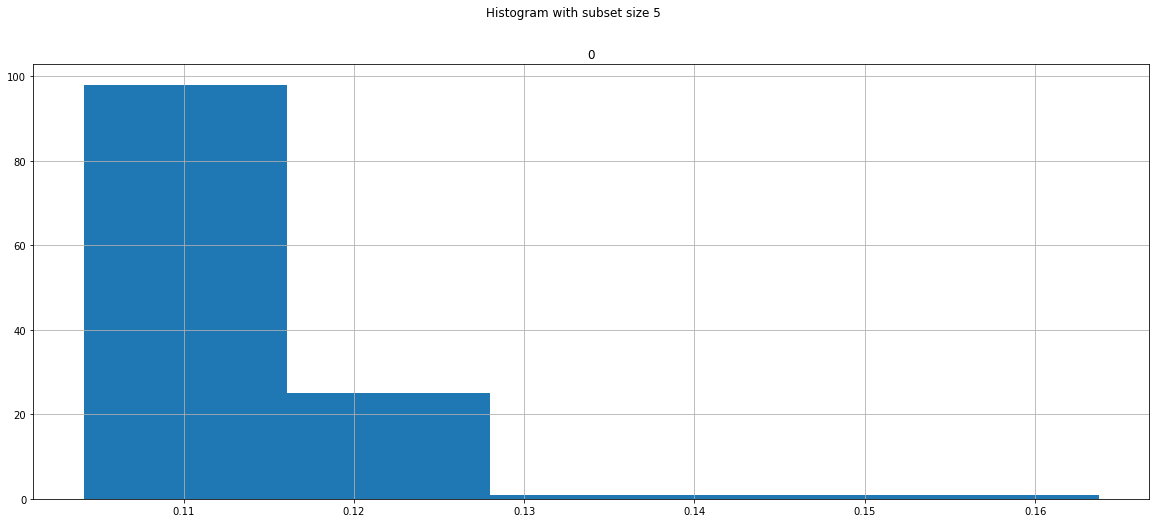

In [13]:
features_error = features_error_by_subset_size[5]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 5')
matplotlib.pyplot.show()

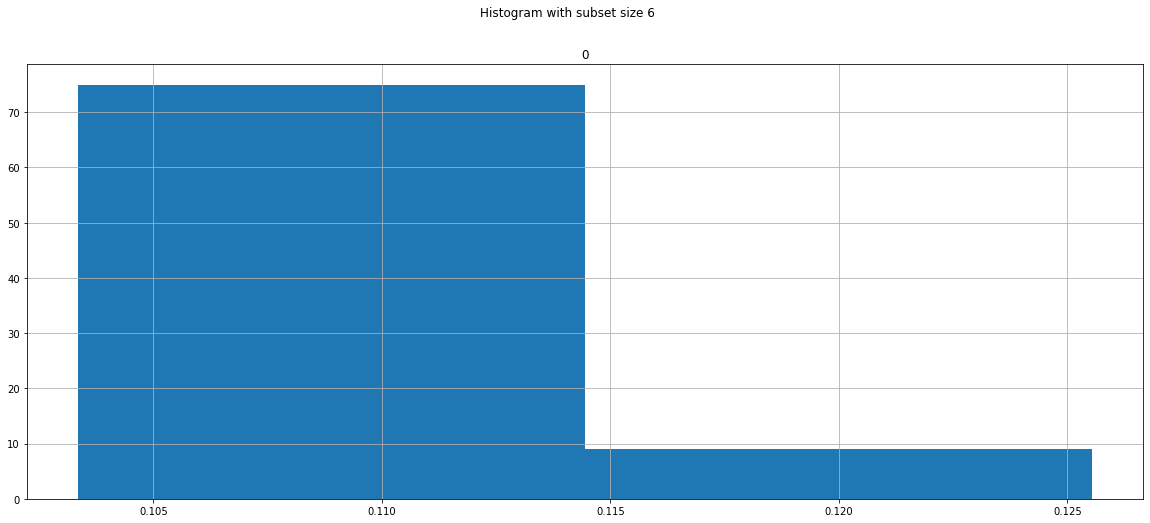

In [14]:
features_error = features_error_by_subset_size[6]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 6')
matplotlib.pyplot.show()

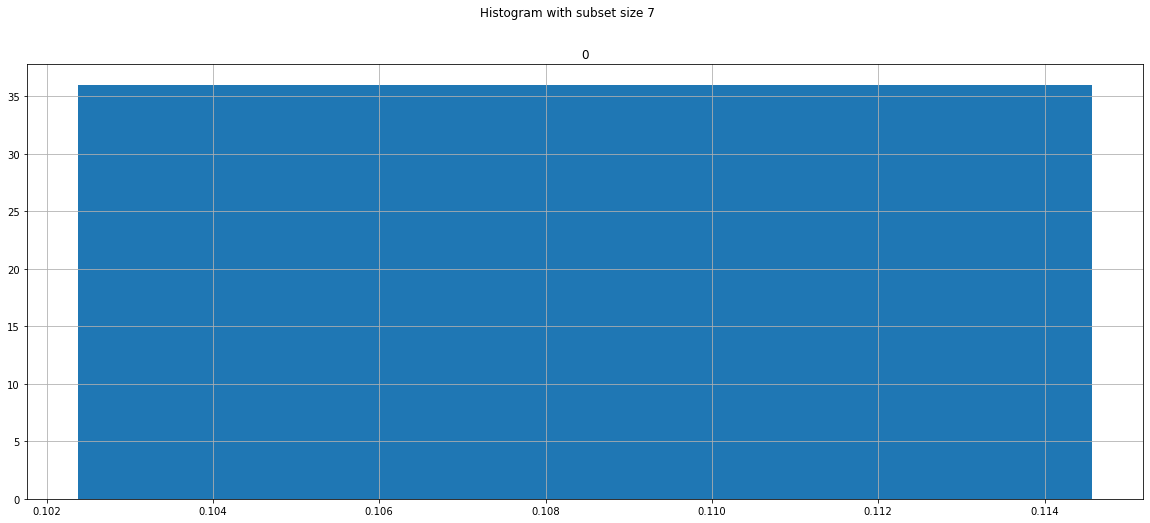

In [15]:
features_error = features_error_by_subset_size[7]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 7')
matplotlib.pyplot.show()

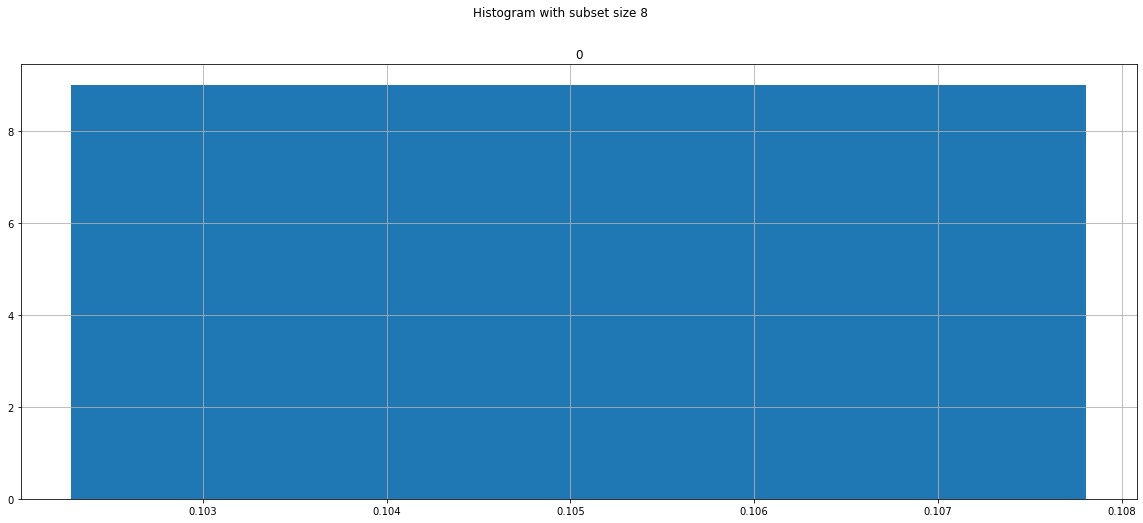

In [16]:
features_error = features_error_by_subset_size[8]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 8')
matplotlib.pyplot.show()

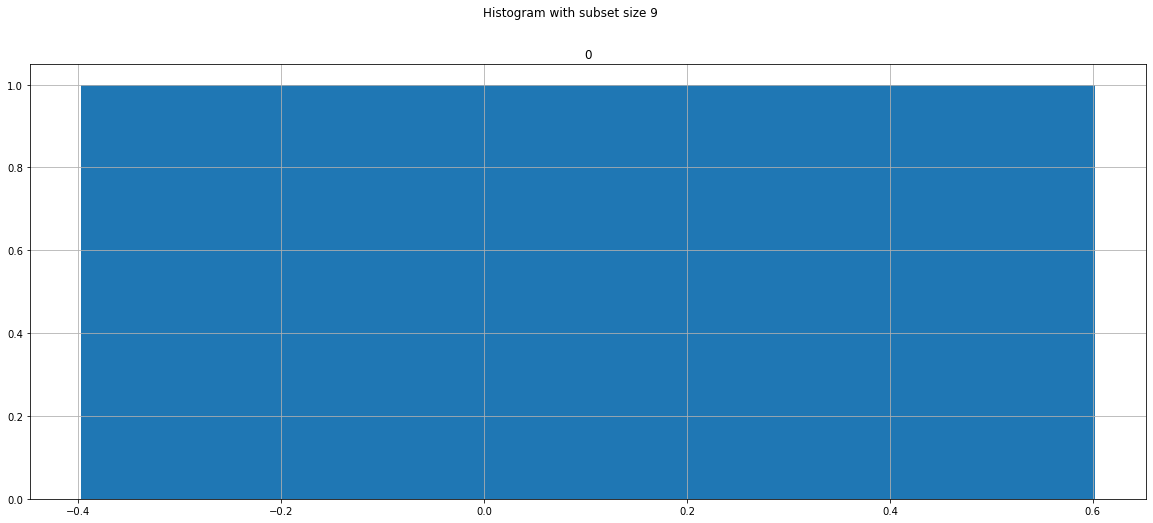

In [17]:
features_error = features_error_by_subset_size[9]
errors = [ error for (feature, error) in features_error ]
bins = int((max(errors) - min(errors)) / 0.01)
bins = 1 if bins == 0 else bins

errors = pandas.DataFrame(errors)
errors.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram with subset size 9')
matplotlib.pyplot.show()

### 3. For the subsets of size 1 to 9, identify the features (i.e., device statistics) that give the smallest error.


In [23]:
smallest_error_by_feature = {}
for (subset_size, features_error) in features_error_by_subset_size.items():
    features_error = sorted(features_error, key=lambda tup: tup[1])
    smallest_error_by_feature[subset_size] = features_error[0]

| Subset feature size | Subset feature | Normalized Mean Absolute Error - NMAE |
| --- | --- | --- |
| 1 | ['ldavg.1'] | 0.10982213249239203 | 
| 2 | ['file.nr', 'ldavg.1'] | 0.10654922746848944 | 
| 3 | ['all_..idle', 'file.nr', 'ldavg.1'] | 0.10589973490195285 |
| 4 | ['all_..idle', 'file.nr', 'ldavg.1', 'tcpsck'] | 0.10483395905628597 |
| 5 | ['all_..idle', 'X..memused', 'file.nr', 'ldavg.1', 'tcpsck'] | 0.10415458189015174 |
| 6 | ['all_..idle', 'X..memused', 'cswch.s', 'ldavg.1', 'tcpsck', 'pgfree.s'] | 0.1033413688000303 |
| 7 | ['all_..idle', 'X..memused', 'cswch.s', 'file.nr', 'ldavg.1', 'tcpsck', 'pgfree.s'] | 0.10237485313087231 |
| 8 | ['all_..idle', 'X..memused', 'proc.s', 'cswch.s', 'file.nr', 'ldavg.1', 'tcpsck', 'pgfree.s'] | 0.10228509197568916
| 9 | ['all_..idle', 'X..memused', 'proc.s', 'cswch.s', 'file.nr', 'sum_intr.s', 'ldavg.1', 'tcpsck', 'pgfree.s'] | 0.10262966549701905 |

### 4. Produce a plot that shows NMAE versus subset size 1 to 9. For each subset, show an error bar or a boxplot with the range of NMAE values.

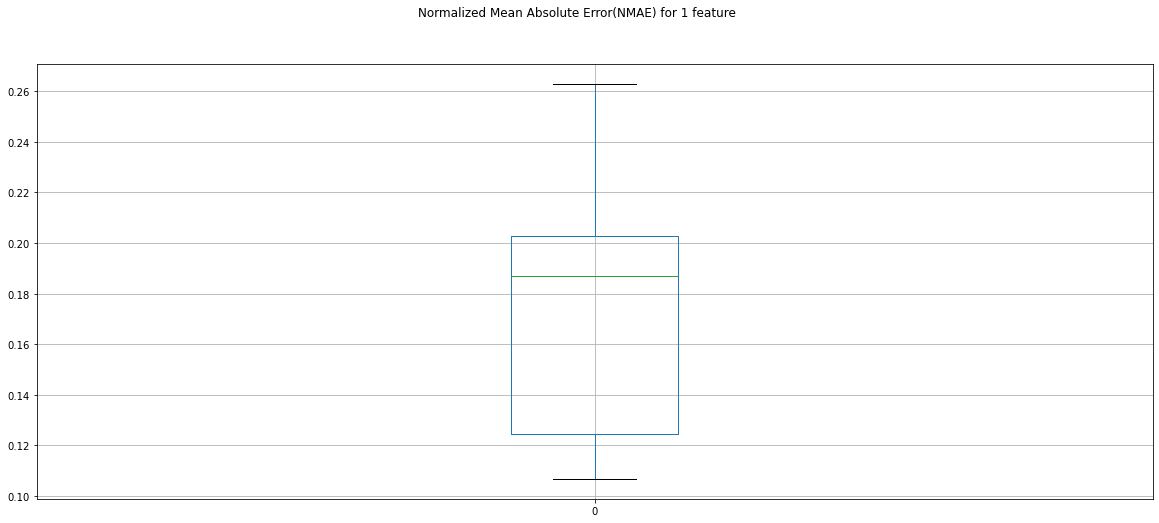

In [82]:
features_error = features_error_by_subset_size[1]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 1 feature')
matplotlib.pyplot.show()

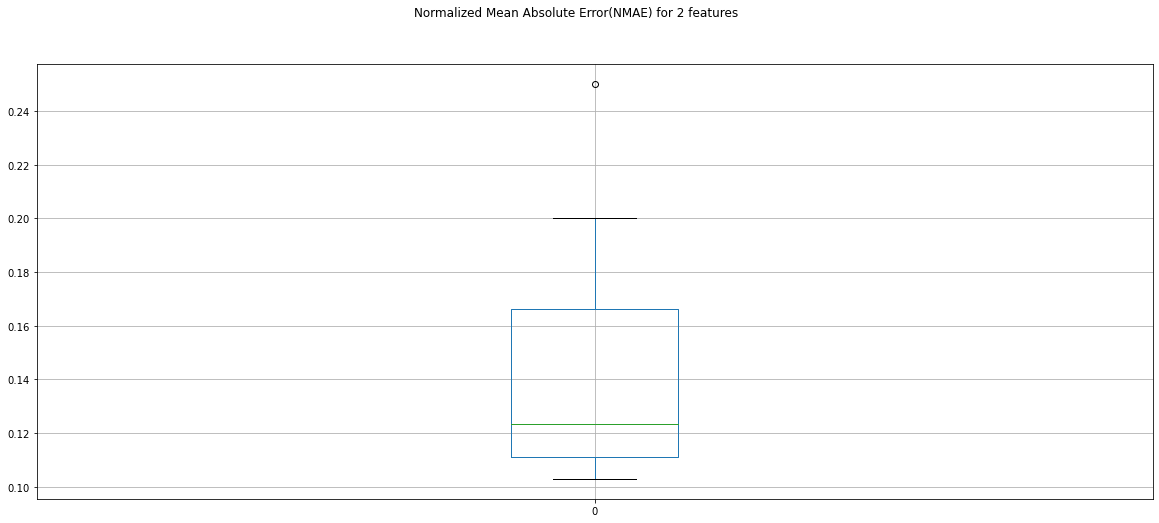

In [81]:
features_error = features_error_by_subset_size[2]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 2 features')
matplotlib.pyplot.show()

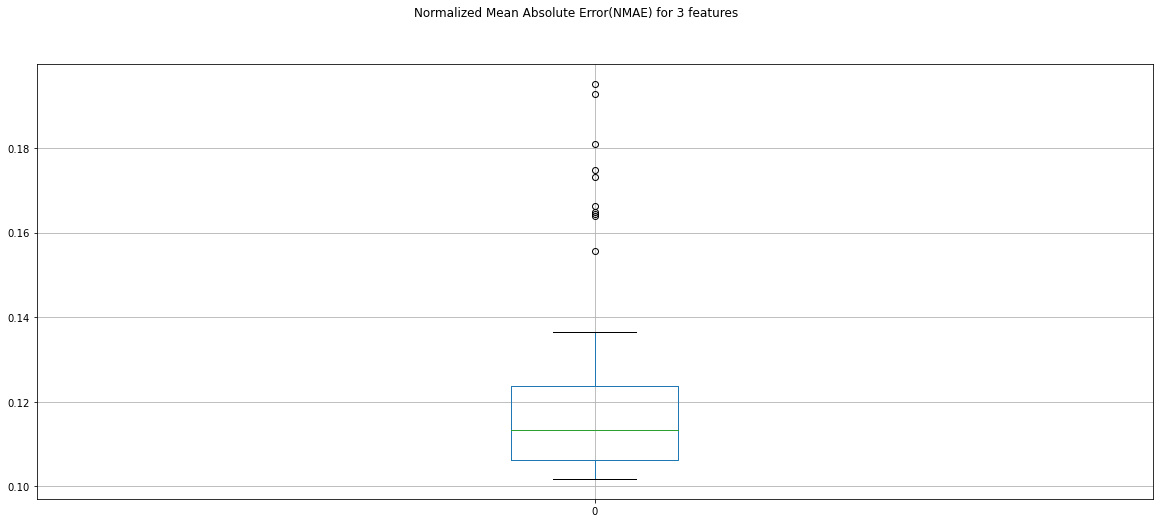

In [80]:
features_error = features_error_by_subset_size[3]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 3 features')
matplotlib.pyplot.show()

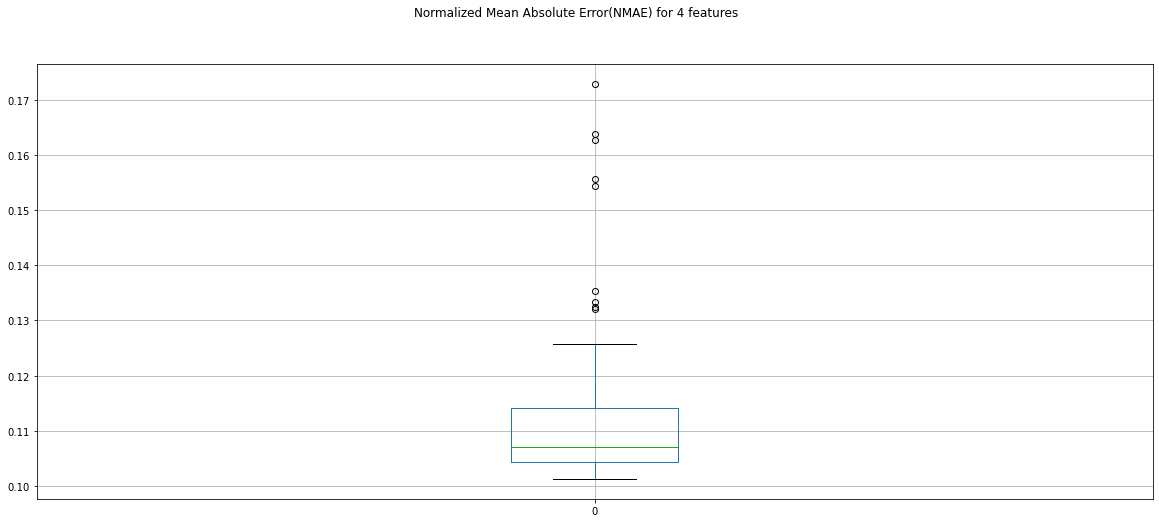

In [79]:
features_error = features_error_by_subset_size[4]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 4 features')
matplotlib.pyplot.show()

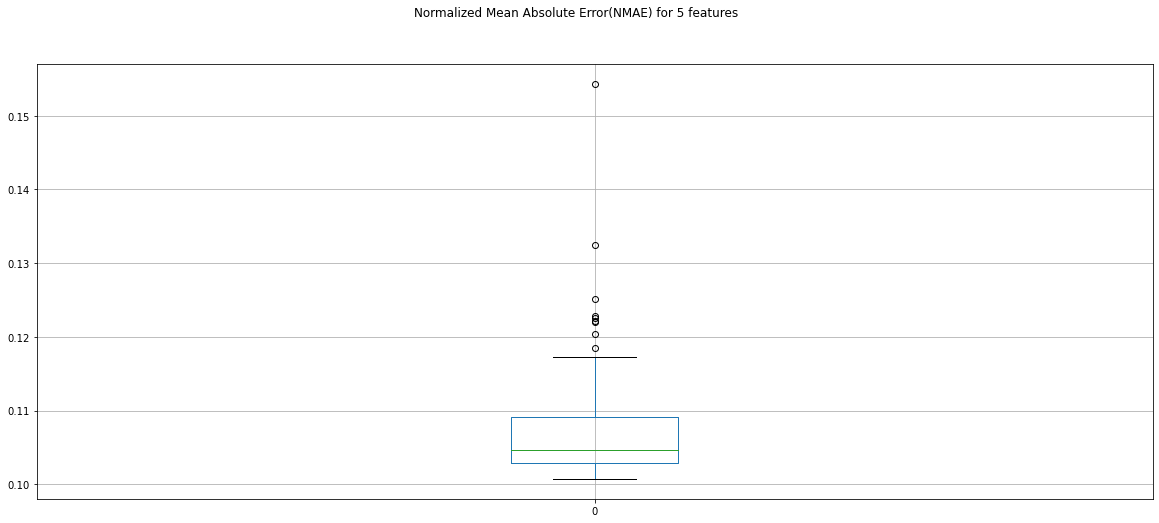

In [78]:
features_error = features_error_by_subset_size[5]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 5 features')
matplotlib.pyplot.show()

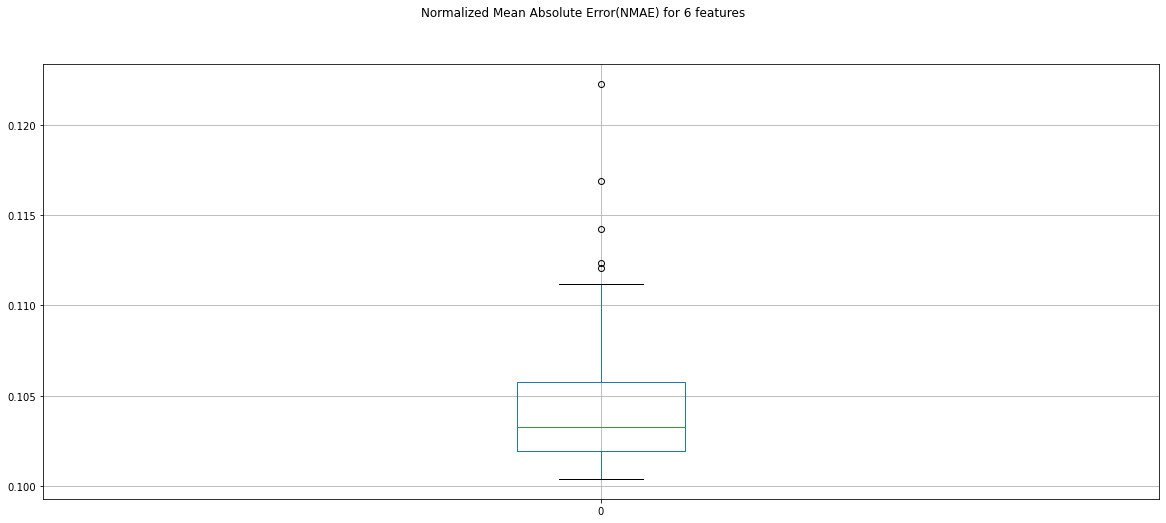

In [74]:
features_error = features_error_by_subset_size[6]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 6 features')
matplotlib.pyplot.show()

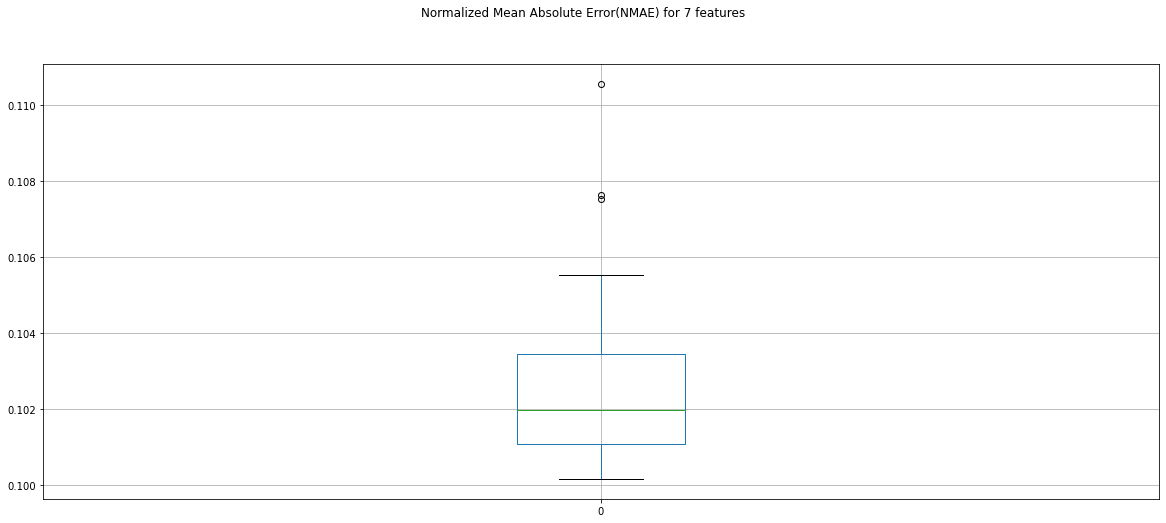

In [75]:
features_error = features_error_by_subset_size[7]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 7 features')
matplotlib.pyplot.show()

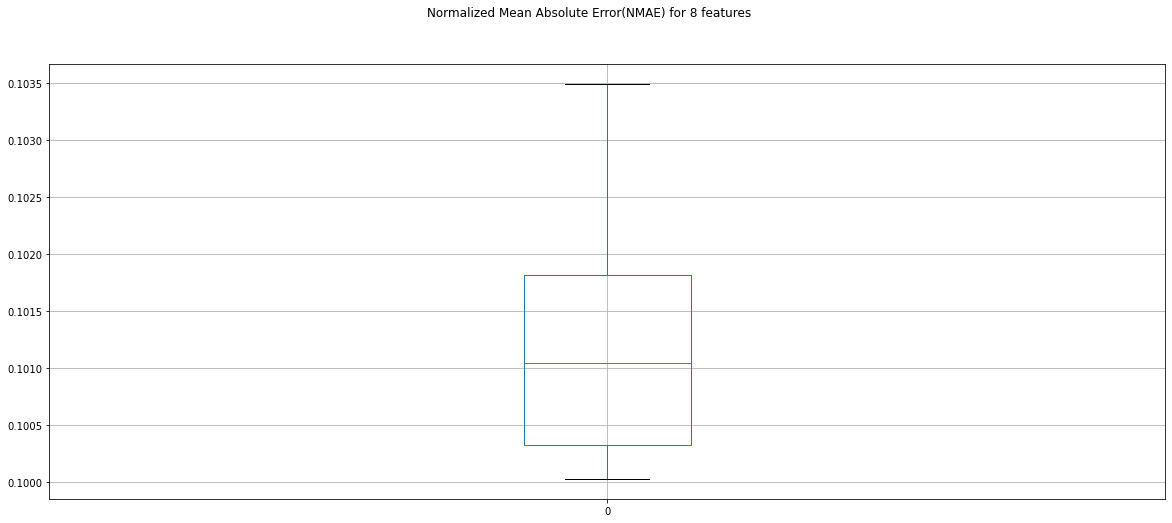

In [76]:
features_error = features_error_by_subset_size[8]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 8 features')
matplotlib.pyplot.show()

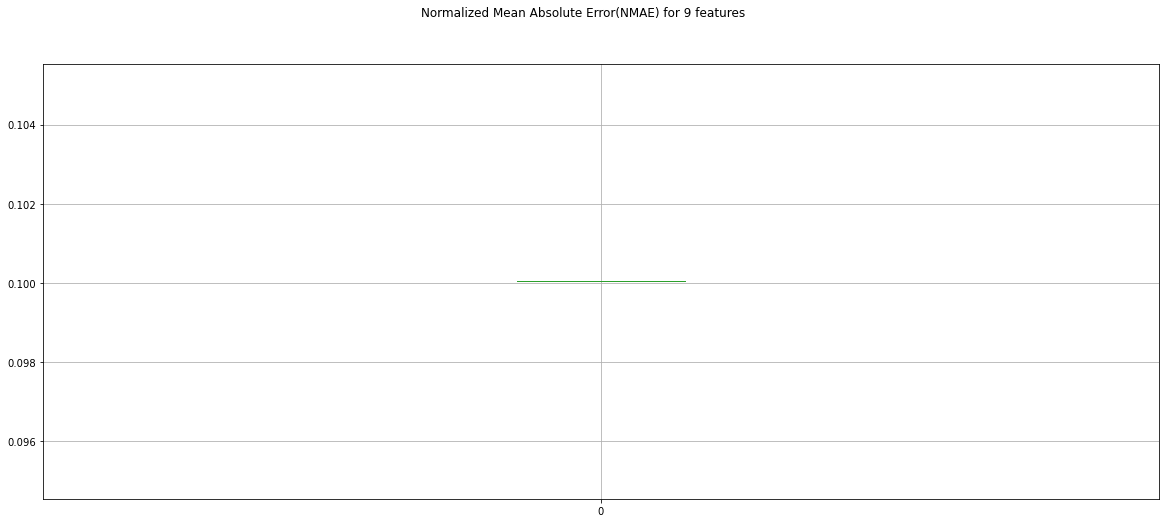

In [77]:
features_error = features_error_by_subset_size[9]
errors = [ error for (feature, error) in features_error ]
errors = pandas.DataFrame(errors)

errors.boxplot(figsize=(20, 8))
pylab.suptitle('Normalized Mean Absolute Error(NMAE) for 9 features')
matplotlib.pyplot.show()

### 5. Describe your observations and conclusions.